In [1]:
import pandas as pd

In [2]:
crop = pd.read_csv("crop.csv")
crop.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN


In [3]:
crop=crop.drop(['Unnamed: 8'], axis=1)
crop=crop.drop(['Unnamed: 9'], axis=1)
crop.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
crop.shape

(2200, 8)

In [5]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   phosphorus   2200 non-null   int64  
 2   potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
crop.isnull().sum()

Nitrogen       0
phosphorus     0
potassium      0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
crop.duplicated().sum()

0

In [8]:
crop.describe()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
def format_summary_statistics(df):
    """
    Create a professionally formatted summary of statistics by crop for each feature.

    Parameters:
    df (pandas.DataFrame): Input dataframe with crop data

    Returns:
    None: Prints formatted statistics
    """
    # Set pandas display options for better formatting
    pd.set_option('display.float_format', lambda x: '%.2f' % x)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)

    features = ['Nitrogen', 'phosphorus', 'potassium', 'temperature', 'humidity', 'ph', 'rainfall']

    print("\n" + "="*80)
    print("CROP-WISE SUMMARY STATISTICS")
    print("="*80)

    for feature in features:
        # Create summary statistics
        stats_df = crop.groupby('label')[feature].describe()

        # Add additional statistics
        stats_df['range'] = stats_df['max'] - stats_df['min']
        stats_df['cv'] = (stats_df['std'] / stats_df['mean']) * 100  # Coefficient of variation

        # Rename columns for better readability
        stats_df = stats_df.rename(columns={
            'count': 'Count',
            'mean': 'Mean',
            'std': 'Std Dev',
            'min': 'Min',
            '25%': '25th Perc',
            '50%': 'Median',
            '75%': '75th Perc',
            'max': 'Max',
            'range': 'Range',
            'cv': 'CV (%)'
        })

        print(f"\n{'-'*80}")
        print(f"Feature: {feature.upper()}")
        print(f"{'-'*80}")

        # Format the DataFrame for display
        styled_df = stats_df.style\
            .format({
                'Count': '{:.0f}',
                'Mean': '{:.2f}',
                'Std Dev': '{:.2f}',
                'Min': '{:.2f}',
                '25th Perc': '{:.2f}',
                'Median': '{:.2f}',
                '75th Perc': '{:.2f}',
                'Max': '{:.2f}',
                'Range': '{:.2f}',
                'CV (%)': '{:.2f}'
            })\
            .background_gradient(cmap='viridis', subset=['Mean', 'Median'])\
            .highlight_max(color='lightgreen', subset=['Max'])\
            .highlight_min(color='lightsalmon', subset=['Min'])

        display(styled_df)

        # Print feature insights
        print("\nKey Insights:")
        print(f"• Highest {feature} requirement: {stats_df['Max'].idxmax()} crop")
        print(f"• Lowest {feature} requirement: {stats_df['Min'].idxmin()} crop")
        print(f"• Most variable {feature} (highest CV): {stats_df['CV (%)'].idxmax()} crop")
        print(f"• Most consistent {feature} (lowest CV): {stats_df['CV (%)'].idxmin()} crop")

# Execute the function
format_summary_statistics(crop)

# Reset display options to default
pd.reset_option('display.float_format')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
format_summary_statistics(crop)


CROP-WISE SUMMARY STATISTICS

--------------------------------------------------------------------------------
Feature: NITROGEN
--------------------------------------------------------------------------------


,Count,Mean,Std Dev,Min,25th Perc,Median,75th Perc,Max,Range,CV (%)
label,,,,,,,,,,
apple,100,20.80,11.86,0.00,10.00,24.00,30.00,40.00,40.00,57.04
banana,100,100.23,11.11,80.00,92.00,100.50,108.25,120.00,40.00,11.08
blackgram,100,40.02,12.66,20.00,28.75,41.00,52.00,60.00,40.00,31.64
chickpea,100,40.09,12.15,20.00,30.00,39.00,52.00,60.00,40.00,30.31
coconut,100,21.98,11.76,0.00,13.75,24.00,31.00,40.00,40.00,53.51
coffee,100,101.20,12.35,80.00,89.00,103.00,112.00,120.00,40.00,12.20
cotton,100,117.77,11.63,100.00,107.75,117.00,127.50,140.00,40.00,9.87
grapes,100,23.18,12.47,0.00,11.75,24.00,35.00,40.00,40.00,53.78
jute,100,78.40,10.97,60.00,70.00,78.00,88.25,100.00,40.00,13.99



Key Insights:
• Highest Nitrogen requirement: cotton crop
• Lowest Nitrogen requirement: apple crop
• Most variable Nitrogen (highest CV): pomegranate crop
• Most consistent Nitrogen (lowest CV): cotton crop

--------------------------------------------------------------------------------
Feature: PHOSPHORUS
--------------------------------------------------------------------------------


,Count,Mean,Std Dev,Min,25th Perc,Median,75th Perc,Max,Range,CV (%)
label,,,,,,,,,,
apple,100,134.22,8.14,120.00,126.75,136.50,141.00,145.00,25.00,6.06
banana,100,82.01,7.69,70.00,75.00,81.00,88.00,95.00,25.00,9.38
blackgram,100,67.47,7.15,55.00,62.00,67.00,74.00,80.00,25.00,10.60
chickpea,100,67.79,7.50,55.00,61.00,68.00,74.00,80.00,25.00,11.06
coconut,100,16.93,8.36,5.00,9.75,15.50,24.25,30.00,25.00,49.36
coffee,100,28.74,7.28,15.00,23.00,29.00,34.25,40.00,25.00,25.32
cotton,100,46.24,7.35,35.00,40.00,46.00,52.00,60.00,25.00,15.89
grapes,100,132.53,7.62,120.00,125.75,133.00,139.00,145.00,25.00,5.75
jute,100,46.86,7.20,35.00,41.00,46.00,53.25,60.00,25.00,15.36



Key Insights:
• Highest phosphorus requirement: apple crop
• Lowest phosphorus requirement: coconut crop
• Most variable phosphorus (highest CV): coconut crop
• Most consistent phosphorus (lowest CV): grapes crop

--------------------------------------------------------------------------------
Feature: POTASSIUM
--------------------------------------------------------------------------------


,Count,Mean,Std Dev,Min,25th Perc,Median,75th Perc,Max,Range,CV (%)
label,,,,,,,,,,
apple,100,199.89,3.32,195.00,197.00,200.00,203.00,205.00,10.00,1.66
banana,100,50.05,3.38,45.00,47.00,50.00,53.00,55.00,10.00,6.76
blackgram,100,19.24,3.19,15.00,16.75,19.00,22.00,25.00,10.00,16.57
chickpea,100,79.92,3.26,75.00,77.00,79.00,83.00,85.00,10.00,4.08
coconut,100,30.59,3.00,25.00,29.00,31.00,33.00,35.00,10.00,9.80
coffee,100,29.94,3.25,25.00,27.00,30.00,33.00,35.00,10.00,10.84
cotton,100,19.56,3.17,15.00,17.00,19.00,22.00,25.00,10.00,16.20
grapes,100,200.11,3.27,195.00,197.00,201.00,203.00,205.00,10.00,1.63
jute,100,39.99,3.31,35.00,37.00,40.00,43.00,45.00,10.00,8.29



Key Insights:
• Highest potassium requirement: apple crop
• Lowest potassium requirement: orange crop
• Most variable potassium (highest CV): orange crop
• Most consistent potassium (lowest CV): grapes crop

--------------------------------------------------------------------------------
Feature: TEMPERATURE
--------------------------------------------------------------------------------


,Count,Mean,Std Dev,Min,25th Perc,Median,75th Perc,Max,Range,CV (%)
label,,,,,,,,,,
apple,100,22.63,0.83,21.04,22.16,22.63,23.34,24.00,2.96,3.66
banana,100,27.38,1.43,25.01,26.11,27.44,28.66,29.91,4.90,5.22
blackgram,100,29.97,2.69,25.10,27.82,29.66,32.38,34.95,9.85,8.96
chickpea,100,18.87,1.17,17.02,17.88,18.88,19.71,21.00,3.97,6.20
coconut,100,27.41,1.39,25.01,26.27,27.39,28.60,29.87,4.86,5.06
coffee,100,25.54,1.50,23.06,24.22,25.66,26.74,27.92,4.86,5.88
cotton,100,23.99,1.14,22.00,23.02,23.96,24.97,25.99,3.99,4.73
grapes,100,23.85,9.74,8.83,16.21,23.02,30.82,41.95,33.12,40.83
jute,100,24.96,1.19,23.09,23.89,24.97,25.89,26.99,3.89,4.75



Key Insights:
• Highest temperature requirement: papaya crop
• Lowest temperature requirement: grapes crop
• Most variable temperature (highest CV): grapes crop
• Most consistent temperature (lowest CV): mungbean crop

--------------------------------------------------------------------------------
Feature: HUMIDITY
--------------------------------------------------------------------------------


,Count,Mean,Std Dev,Min,25th Perc,Median,75th Perc,Max,Range,CV (%)
label,,,,,,,,,,
apple,100,92.33,1.46,90.03,90.97,92.42,93.51,94.92,4.89,1.58
banana,100,80.36,2.81,75.03,78.06,80.22,82.96,84.98,9.95,3.49
blackgram,100,65.12,2.80,60.07,63.04,65.03,67.74,69.96,9.90,4.30
chickpea,100,16.86,1.71,14.26,15.39,16.66,18.27,19.97,5.71,10.15
coconut,100,94.84,2.69,90.02,92.54,94.96,96.76,99.98,9.96,2.83
coffee,100,58.87,5.84,50.05,53.81,57.65,63.58,69.95,19.90,9.92
cotton,100,79.84,3.05,75.01,77.04,80.01,82.36,84.88,9.87,3.82
grapes,100,81.88,1.18,80.02,80.86,81.72,82.90,83.98,3.97,1.44
jute,100,79.64,5.51,70.88,74.59,79.47,83.23,89.89,19.01,6.92



Key Insights:
• Highest humidity requirement: coconut crop
• Lowest humidity requirement: chickpea crop
• Most variable humidity (highest CV): pigeonpeas crop
• Most consistent humidity (lowest CV): grapes crop

--------------------------------------------------------------------------------
Feature: PH
--------------------------------------------------------------------------------


,Count,Mean,Std Dev,Min,25th Perc,Median,75th Perc,Max,Range,CV (%)
label,,,,,,,,,,
apple,100,5.93,0.27,5.51,5.71,5.89,6.14,6.50,0.98,4.54
banana,100,5.98,0.27,5.51,5.74,5.99,6.21,6.49,0.98,4.52
blackgram,100,7.13,0.37,6.50,6.81,7.17,7.42,7.78,1.28,5.22
chickpea,100,7.34,0.80,5.99,6.60,7.36,7.86,8.87,2.88,10.92
coconut,100,5.98,0.29,5.50,5.73,5.99,6.21,6.47,0.97,4.81
coffee,100,6.79,0.42,6.02,6.43,6.80,7.13,7.49,1.47,6.14
cotton,100,6.91,0.63,5.80,6.36,6.84,7.43,7.99,2.19,9.07
grapes,100,6.03,0.30,5.51,5.78,6.00,6.31,6.50,0.99,4.95
jute,100,6.73,0.45,6.00,6.35,6.71,7.13,7.49,1.49,6.63



Key Insights:
• Highest ph requirement: mothbeans crop
• Lowest ph requirement: mothbeans crop
• Most variable ph (highest CV): mothbeans crop
• Most consistent ph (lowest CV): papaya crop

--------------------------------------------------------------------------------
Feature: RAINFALL
--------------------------------------------------------------------------------


,Count,Mean,Std Dev,Min,25th Perc,Median,75th Perc,Max,Range,CV (%)
label,,,,,,,,,,
apple,100,112.65,7.10,100.12,106.07,112.98,118.45,124.98,24.87,6.31
banana,100,104.63,9.40,90.11,96.47,105.01,112.09,119.85,29.74,8.98
blackgram,100,67.88,4.18,60.42,64.05,68.29,71.40,74.92,14.50,6.16
chickpea,100,80.06,7.94,65.11,73.61,79.69,85.82,94.78,29.67,9.92
coconut,100,175.69,29.47,131.09,149.13,172.00,202.35,225.63,94.54,16.78
coffee,100,158.07,25.70,115.16,136.01,157.77,181.47,199.47,84.32,16.26
cotton,100,80.40,11.23,60.65,70.89,80.24,90.42,99.93,39.28,13.97
grapes,100,69.61,2.95,65.01,66.84,69.54,71.61,74.92,9.90,4.24
jute,100,174.79,15.08,150.24,161.09,175.59,187.64,199.84,49.60,8.63



Key Insights:
• Highest rainfall requirement: rice crop
• Lowest rainfall requirement: muskmelon crop
• Most variable rainfall (highest CV): papaya crop
• Most consistent rainfall (lowest CV): pomegranate crop

CROP-WISE SUMMARY STATISTICS

--------------------------------------------------------------------------------
Feature: NITROGEN
--------------------------------------------------------------------------------


,Count,Mean,Std Dev,Min,25th Perc,Median,75th Perc,Max,Range,CV (%)
label,,,,,,,,,,
apple,100,20.80,11.86,0.00,10.00,24.00,30.00,40.00,40.00,57.04
banana,100,100.23,11.11,80.00,92.00,100.50,108.25,120.00,40.00,11.08
blackgram,100,40.02,12.66,20.00,28.75,41.00,52.00,60.00,40.00,31.64
chickpea,100,40.09,12.15,20.00,30.00,39.00,52.00,60.00,40.00,30.31
coconut,100,21.98,11.76,0.00,13.75,24.00,31.00,40.00,40.00,53.51
coffee,100,101.20,12.35,80.00,89.00,103.00,112.00,120.00,40.00,12.20
cotton,100,117.77,11.63,100.00,107.75,117.00,127.50,140.00,40.00,9.87
grapes,100,23.18,12.47,0.00,11.75,24.00,35.00,40.00,40.00,53.78
jute,100,78.40,10.97,60.00,70.00,78.00,88.25,100.00,40.00,13.99



Key Insights:
• Highest Nitrogen requirement: cotton crop
• Lowest Nitrogen requirement: apple crop
• Most variable Nitrogen (highest CV): pomegranate crop
• Most consistent Nitrogen (lowest CV): cotton crop

--------------------------------------------------------------------------------
Feature: PHOSPHORUS
--------------------------------------------------------------------------------


,Count,Mean,Std Dev,Min,25th Perc,Median,75th Perc,Max,Range,CV (%)
label,,,,,,,,,,
apple,100,134.22,8.14,120.00,126.75,136.50,141.00,145.00,25.00,6.06
banana,100,82.01,7.69,70.00,75.00,81.00,88.00,95.00,25.00,9.38
blackgram,100,67.47,7.15,55.00,62.00,67.00,74.00,80.00,25.00,10.60
chickpea,100,67.79,7.50,55.00,61.00,68.00,74.00,80.00,25.00,11.06
coconut,100,16.93,8.36,5.00,9.75,15.50,24.25,30.00,25.00,49.36
coffee,100,28.74,7.28,15.00,23.00,29.00,34.25,40.00,25.00,25.32
cotton,100,46.24,7.35,35.00,40.00,46.00,52.00,60.00,25.00,15.89
grapes,100,132.53,7.62,120.00,125.75,133.00,139.00,145.00,25.00,5.75
jute,100,46.86,7.20,35.00,41.00,46.00,53.25,60.00,25.00,15.36



Key Insights:
• Highest phosphorus requirement: apple crop
• Lowest phosphorus requirement: coconut crop
• Most variable phosphorus (highest CV): coconut crop
• Most consistent phosphorus (lowest CV): grapes crop

--------------------------------------------------------------------------------
Feature: POTASSIUM
--------------------------------------------------------------------------------


,Count,Mean,Std Dev,Min,25th Perc,Median,75th Perc,Max,Range,CV (%)
label,,,,,,,,,,
apple,100,199.89,3.32,195.00,197.00,200.00,203.00,205.00,10.00,1.66
banana,100,50.05,3.38,45.00,47.00,50.00,53.00,55.00,10.00,6.76
blackgram,100,19.24,3.19,15.00,16.75,19.00,22.00,25.00,10.00,16.57
chickpea,100,79.92,3.26,75.00,77.00,79.00,83.00,85.00,10.00,4.08
coconut,100,30.59,3.00,25.00,29.00,31.00,33.00,35.00,10.00,9.80
coffee,100,29.94,3.25,25.00,27.00,30.00,33.00,35.00,10.00,10.84
cotton,100,19.56,3.17,15.00,17.00,19.00,22.00,25.00,10.00,16.20
grapes,100,200.11,3.27,195.00,197.00,201.00,203.00,205.00,10.00,1.63
jute,100,39.99,3.31,35.00,37.00,40.00,43.00,45.00,10.00,8.29



Key Insights:
• Highest potassium requirement: apple crop
• Lowest potassium requirement: orange crop
• Most variable potassium (highest CV): orange crop
• Most consistent potassium (lowest CV): grapes crop

--------------------------------------------------------------------------------
Feature: TEMPERATURE
--------------------------------------------------------------------------------


,Count,Mean,Std Dev,Min,25th Perc,Median,75th Perc,Max,Range,CV (%)
label,,,,,,,,,,
apple,100,22.63,0.83,21.04,22.16,22.63,23.34,24.00,2.96,3.66
banana,100,27.38,1.43,25.01,26.11,27.44,28.66,29.91,4.90,5.22
blackgram,100,29.97,2.69,25.10,27.82,29.66,32.38,34.95,9.85,8.96
chickpea,100,18.87,1.17,17.02,17.88,18.88,19.71,21.00,3.97,6.20
coconut,100,27.41,1.39,25.01,26.27,27.39,28.60,29.87,4.86,5.06
coffee,100,25.54,1.50,23.06,24.22,25.66,26.74,27.92,4.86,5.88
cotton,100,23.99,1.14,22.00,23.02,23.96,24.97,25.99,3.99,4.73
grapes,100,23.85,9.74,8.83,16.21,23.02,30.82,41.95,33.12,40.83
jute,100,24.96,1.19,23.09,23.89,24.97,25.89,26.99,3.89,4.75



Key Insights:
• Highest temperature requirement: papaya crop
• Lowest temperature requirement: grapes crop
• Most variable temperature (highest CV): grapes crop
• Most consistent temperature (lowest CV): mungbean crop

--------------------------------------------------------------------------------
Feature: HUMIDITY
--------------------------------------------------------------------------------


,Count,Mean,Std Dev,Min,25th Perc,Median,75th Perc,Max,Range,CV (%)
label,,,,,,,,,,
apple,100,92.33,1.46,90.03,90.97,92.42,93.51,94.92,4.89,1.58
banana,100,80.36,2.81,75.03,78.06,80.22,82.96,84.98,9.95,3.49
blackgram,100,65.12,2.80,60.07,63.04,65.03,67.74,69.96,9.90,4.30
chickpea,100,16.86,1.71,14.26,15.39,16.66,18.27,19.97,5.71,10.15
coconut,100,94.84,2.69,90.02,92.54,94.96,96.76,99.98,9.96,2.83
coffee,100,58.87,5.84,50.05,53.81,57.65,63.58,69.95,19.90,9.92
cotton,100,79.84,3.05,75.01,77.04,80.01,82.36,84.88,9.87,3.82
grapes,100,81.88,1.18,80.02,80.86,81.72,82.90,83.98,3.97,1.44
jute,100,79.64,5.51,70.88,74.59,79.47,83.23,89.89,19.01,6.92



Key Insights:
• Highest humidity requirement: coconut crop
• Lowest humidity requirement: chickpea crop
• Most variable humidity (highest CV): pigeonpeas crop
• Most consistent humidity (lowest CV): grapes crop

--------------------------------------------------------------------------------
Feature: PH
--------------------------------------------------------------------------------


,Count,Mean,Std Dev,Min,25th Perc,Median,75th Perc,Max,Range,CV (%)
label,,,,,,,,,,
apple,100,5.93,0.27,5.51,5.71,5.89,6.14,6.50,0.98,4.54
banana,100,5.98,0.27,5.51,5.74,5.99,6.21,6.49,0.98,4.52
blackgram,100,7.13,0.37,6.50,6.81,7.17,7.42,7.78,1.28,5.22
chickpea,100,7.34,0.80,5.99,6.60,7.36,7.86,8.87,2.88,10.92
coconut,100,5.98,0.29,5.50,5.73,5.99,6.21,6.47,0.97,4.81
coffee,100,6.79,0.42,6.02,6.43,6.80,7.13,7.49,1.47,6.14
cotton,100,6.91,0.63,5.80,6.36,6.84,7.43,7.99,2.19,9.07
grapes,100,6.03,0.30,5.51,5.78,6.00,6.31,6.50,0.99,4.95
jute,100,6.73,0.45,6.00,6.35,6.71,7.13,7.49,1.49,6.63



Key Insights:
• Highest ph requirement: mothbeans crop
• Lowest ph requirement: mothbeans crop
• Most variable ph (highest CV): mothbeans crop
• Most consistent ph (lowest CV): papaya crop

--------------------------------------------------------------------------------
Feature: RAINFALL
--------------------------------------------------------------------------------


,Count,Mean,Std Dev,Min,25th Perc,Median,75th Perc,Max,Range,CV (%)
label,,,,,,,,,,
apple,100,112.65,7.10,100.12,106.07,112.98,118.45,124.98,24.87,6.31
banana,100,104.63,9.40,90.11,96.47,105.01,112.09,119.85,29.74,8.98
blackgram,100,67.88,4.18,60.42,64.05,68.29,71.40,74.92,14.50,6.16
chickpea,100,80.06,7.94,65.11,73.61,79.69,85.82,94.78,29.67,9.92
coconut,100,175.69,29.47,131.09,149.13,172.00,202.35,225.63,94.54,16.78
coffee,100,158.07,25.70,115.16,136.01,157.77,181.47,199.47,84.32,16.26
cotton,100,80.40,11.23,60.65,70.89,80.24,90.42,99.93,39.28,13.97
grapes,100,69.61,2.95,65.01,66.84,69.54,71.61,74.92,9.90,4.24
jute,100,174.79,15.08,150.24,161.09,175.59,187.64,199.84,49.60,8.63



Key Insights:
• Highest rainfall requirement: rice crop
• Lowest rainfall requirement: muskmelon crop
• Most variable rainfall (highest CV): papaya crop
• Most consistent rainfall (lowest CV): pomegranate crop


In [10]:
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [11]:
#Encoding
crop_dict = {
    'rice': 0,
    'maize': 1,
    'jute': 2,
    'cotton': 3,
    'coconut': 4,
    'papaya': 5,
    'orange': 6,
    'apple': 7,
    'muskmelon': 8,
    'watermelon': 9,
    'grapes': 10,
    'mango': 11,
    'banana': 12,
    'pomegranate': 13,
    'lentil': 14,
    'blackgram': 15,
    'mungbean': 16,
    'mothbeans': 17,
    'pigeonpeas': 18,
    'kidneybeans': 19,
    'chickpea': 20,
    'coffee': 21
}
crop['crop_num']=  crop['label'].map(crop_dict)

In [14]:
crop

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.88,82.00,6.50,202.94,rice,0
1,85,58,41,21.77,80.32,7.04,226.66,rice,0
2,60,55,44,23.00,82.32,7.84,263.96,rice,0
3,74,35,40,26.49,80.16,6.98,242.86,rice,0
4,78,42,42,20.13,81.60,7.63,262.72,rice,0
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.77,66.41,6.78,177.77,coffee,21
2196,99,15,27,27.42,56.64,6.09,127.92,coffee,21
2197,118,33,30,24.13,67.23,6.36,173.32,coffee,21
2198,117,32,34,26.27,52.13,6.76,127.18,coffee,21


In [15]:
crop.drop(['label'],axis=1,inplace=True)
crop

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.88,82.00,6.50,202.94,0
1,85,58,41,21.77,80.32,7.04,226.66,0
2,60,55,44,23.00,82.32,7.84,263.96,0
3,74,35,40,26.49,80.16,6.98,242.86,0
4,78,42,42,20.13,81.60,7.63,262.72,0
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.77,66.41,6.78,177.77,21
2196,99,15,27,27.42,56.64,6.09,127.92,21
2197,118,33,30,24.13,67.23,6.36,173.32,21
2198,117,32,34,26.27,52.13,6.76,127.18,21


In [16]:
#Exploratory Data Analysis
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

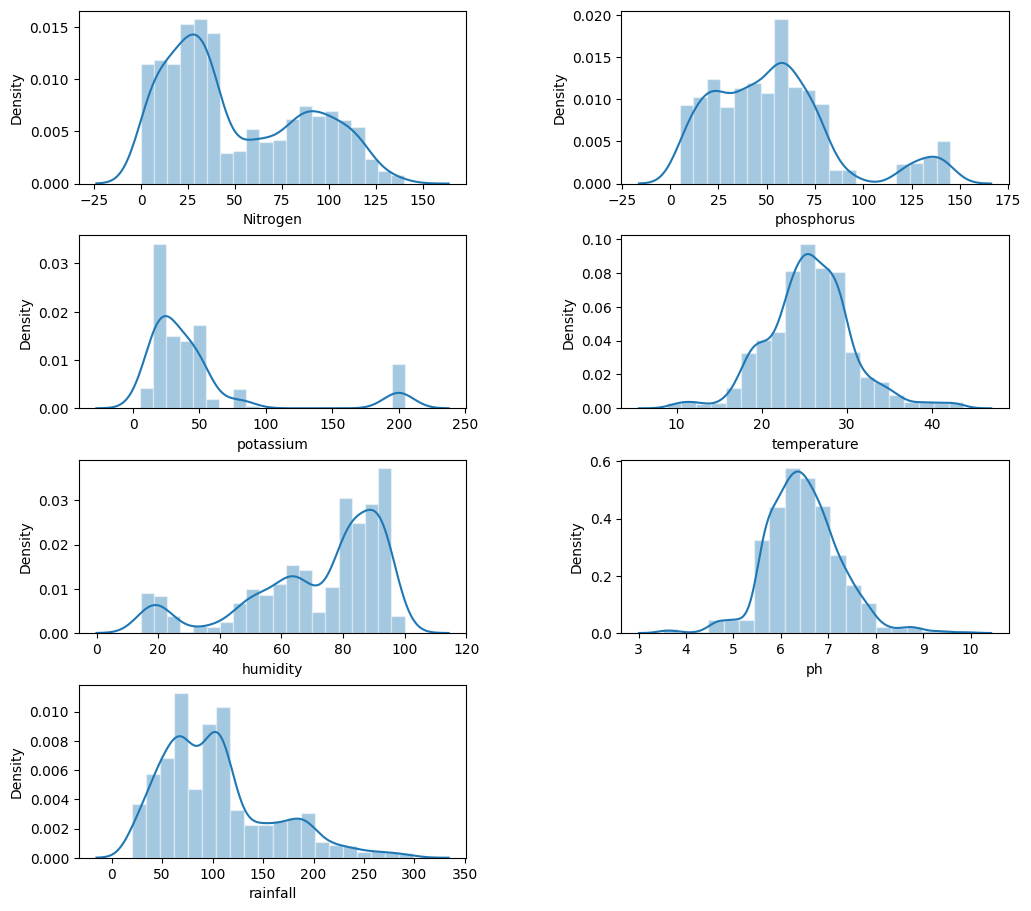

In [13]:
plt.figure(1, figsize=(12,11))
n = 0 
for x in ['Nitrogen','phosphorus','potassium','temperature','humidity','ph','rainfall']:
    n += 1
    plt.subplot(4,2,n)
    plt.subplots_adjust(hspace=0.3, wspace=0.4)
    sns.histplot(crop[x],bins=20, kde=True,stat="density", kde_kws=dict(cut=3),alpha=.4, edgecolor=(1, 1, 1, .4))
plt.savefig('Figure 2.png', dpi=1000, bbox_inches='tight')
plt.show()

In [17]:
#Splitting of data for Training and Testing
x = crop.drop(['crop_num'],axis=1)
y = crop['crop_num']

In [18]:
x

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
0,90,42,43,20.88,82.00,6.50,202.94
1,85,58,41,21.77,80.32,7.04,226.66
2,60,55,44,23.00,82.32,7.84,263.96
3,74,35,40,26.49,80.16,6.98,242.86
4,78,42,42,20.13,81.60,7.63,262.72
...,...,...,...,...,...,...,...
2195,107,34,32,26.77,66.41,6.78,177.77
2196,99,15,27,27.42,56.64,6.09,127.92
2197,118,33,30,24.13,67.23,6.36,173.32
2198,117,32,34,26.27,52.13,6.76,127.18


In [19]:
y

0        0
1        0
2        0
3        0
4        0
        ..
2195    21
2196    21
2197    21
2198    21
2199    21
Name: crop_num, Length: 2200, dtype: int64

In [20]:
#Data Splitting
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import (
    precision_score, recall_score, f1_score, accuracy_score, mean_absolute_error, 
    mean_squared_error, r2_score, confusion_matrix, classification_report
)
from math import sqrt

In [21]:
# Specificity calculation (True Negative Rate)
import numpy as np
def specificity_score(y_true, y_pred, target_class):
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # True Negatives (TN) = Sum of all cells excluding FP and diagonal
    tn = np.sum(cm) - (np.sum(cm, axis=0) - np.diag(cm)).sum()
    
    # False Positives (FP) = Sum of all FP (column sums excluding diagonal)
    fp = (np.sum(cm, axis=0) - np.diag(cm)).sum()
    
    # Specificity = TN / (TN + FP)
    specificity = (tn / (tn + fp)) * 100 if (tn + fp) > 0 else 0
    return specificity


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
# Variables for Accuracy and Models
acc = []
model = []

In [23]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

RandomForest = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=42, max_depth=None,oob_score=True)
RandomForest.fit(x_train, y_train)

#checking oob_score
RandomForest.oob_score_

0.9948863636363636

In [24]:
y_pred = RandomForest.predict(x_test)
precision = precision_score(y_test, y_pred, average='weighted')  # weighted for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
specificity = specificity_score(y_test, y_pred,0)

print(f"Accuracy: {accuracy * 100:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision * 100:.4f}")
print(f"Recall: {recall * 100:.4f}")
print(f"F1 Score: {f1 * 100:.4f}")

acc.append(accuracy * 100)
model.append('Random Forest')
print('Classification report:\n', report)

Accuracy: 99.3182
Specificity: 99.3182
Precision: 99.3735
Recall: 99.3182
F1 Score: 99.3175
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       1.00      1.00      1.00        21
           2       0.92      1.00      0.96        23
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        19
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        23
          14       0.92      1.00      0.96        11
          15       

In [25]:
#Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(RandomForest, x, y,cv= 10)
print(f"Cross-Validation Accuracy Scores: {score}")
print(f"Mean CV Accuracy: {score.mean() * 100:.4f}")

Cross-Validation Accuracy Scores: [0.99545455 0.99545455 1.         0.99090909 0.99545455 0.99545455
 0.99545455 0.99545455 0.97727273 0.99545455]
Mean CV Accuracy: 99.3636


In [26]:
# Training and Testing Accuracy
train_accuracy = RandomForest.score(x_train, y_train)
test_accuracy = RandomForest.score(x_test, y_test)

print(f"Training Accuracy: {train_accuracy * 100:.4f}")
print(f"Testing Accuracy: {test_accuracy * 100:.4f}")

Training Accuracy: 100.0000
Testing Accuracy: 99.3182


In [27]:
feature_scores = pd.Series(RandomForest.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

rainfall      0.23
humidity      0.21
potassium     0.18
phosphorus    0.14
Nitrogen      0.11
temperature   0.08
ph            0.05
dtype: float64

In [28]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=None)
DecisionTree.fit(x_train, y_train)

y_pred = DecisionTree.predict(x_test)
precision = precision_score(y_test, y_pred, average='weighted')  # weighted for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
specificity = specificity_score(y_test, y_pred,0)

print(f"Specificity: {specificity:.4f}")
print(f"Accuracy: {accuracy * 100:.4f}")
print(f"Precision: {precision * 100:.4f}")
print(f"Recall: {recall * 100:.4f}")
print(f"F1 Score: {f1 * 100:.4f}")

acc.append(accuracy * 100)
model.append('Decision Tree')
print('Classification report:\n', report)

Specificity: 98.8636
Accuracy: 98.8636
Precision: 98.8997
Recall: 98.8636
F1 Score: 98.8595
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       1.00      1.00      1.00        21
           2       0.92      0.96      0.94        23
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        19
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        23
          14       0.92      1.00      0.96        11
          15       

In [29]:
score = cross_val_score(DecisionTree, x, y,cv= 10)
print(f"Cross-Validation Accuracy Scores: {score}")
print(f"Mean CV Accuracy: {score.mean() * 100:.4f}")

Cross-Validation Accuracy Scores: [1.         0.99090909 0.99545455 0.99090909 0.99090909 0.99090909
 0.99090909 0.99090909 0.97727273 0.98181818]
Mean CV Accuracy: 99.0000


In [30]:
# Training and Testing Accuracy
train_accuracy = DecisionTree.score(x_train, y_train)
test_accuracy = DecisionTree.score(x_test, y_test)

print(f"Training Accuracy: {train_accuracy * 100:.4f}")
print(f"Testing Accuracy: {test_accuracy * 100:.4f}")

Training Accuracy: 100.0000
Testing Accuracy: 98.8636


In [31]:
#SVM
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(x_train)
X_train_norm = norm.transform(x_train)
# transform testing dataabs
X_test_norm = norm.transform(x_test)
SVM = SVC(kernel='poly',degree=2,C=1)
SVM.fit(X_train_norm,y_train)
y_pred = SVM.predict(X_test_norm)

precision = precision_score(y_test, y_pred, average='weighted')  # weighted for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
specificity = specificity_score(y_test, y_pred,0)

print(f"Specificity: {specificity:.4f}")
print(f"Accuracy: {accuracy * 100:.4f}")
print(f"Precision: {precision * 100:.4f}")
print(f"Recall: {recall * 100:.4f}")
print(f"F1 Score: {f1 * 100:.4f}")

acc.append(accuracy * 100)
model.append('Support Vector Machine')
print('Classification report:\n', report)

Specificity: 97.2727
Accuracy: 97.2727
Precision: 97.5500
Recall: 97.2727
F1 Score: 97.2710
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.74      0.82        19
           1       1.00      0.95      0.98        21
           2       0.81      0.96      0.88        23
           3       0.94      1.00      0.97        17
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        19
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        23
          14       0.79      1.00      0.88        11
          15       

In [32]:
score = cross_val_score(SVM,x,y,cv=10)
print(f"Cross-Validation Accuracy Scores: {score}")
print(f"Mean CV Accuracy: {score.mean() * 100:.4f}")

Cross-Validation Accuracy Scores: [0.98636364 0.98636364 0.99090909 0.96363636 0.99090909 0.99090909
 0.99090909 0.97272727 0.97727273 0.97727273]
Mean CV Accuracy: 98.2727


In [33]:
# Training and Testing Accuracy
train_accuracy = SVM.score(X_train_norm, y_train)
test_accuracy = SVM.score(X_test_norm, y_test)

print(f"Training Accuracy: {train_accuracy * 100:.4f}")
print(f"Testing Accuracy: {test_accuracy * 100:.4f}")

Training Accuracy: 98.8636
Testing Accuracy: 97.2727


In [34]:
#XGBoost
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(x_train,y_train)
y_pred = XB.predict(x_test)

precision = precision_score(y_test, y_pred, average='weighted')  # weighted for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
specificity = specificity_score(y_test, y_pred,0)

print(f"Specificity: {specificity:.4f}")
print(f"Accuracy: {accuracy * 100:.4f}")
print(f"Precision: {precision * 100:.4f}")
print(f"Recall: {recall * 100:.4f}")
print(f"F1 Score: {f1 * 100:.4f}")

acc.append(accuracy * 100)
model.append('Extreme Gradient Boost')
print('Classification report:\n', report)

Specificity: 98.6364
Accuracy: 98.6364
Precision: 98.6901
Recall: 98.6364
F1 Score: 98.6347
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       1.00      0.95      0.98        21
           2       0.96      0.96      0.96        23
           3       0.94      1.00      0.97        17
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        19
          10       1.00      1.00      1.00        14
          11       0.95      1.00      0.97        19
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        23
          14       0.92      1.00      0.96        11
          15       

In [35]:
score = cross_val_score(XB,x,y,cv=5)
print(f"Cross-Validation Accuracy Scores: {score}")
print(f"Mean CV Accuracy: {score.mean() * 100:.4f}")

Cross-Validation Accuracy Scores: [0.99545455 0.98863636 0.99545455 0.99545455 0.98863636]
Mean CV Accuracy: 99.2727


In [36]:
# Training and Testing Accuracy
train_accuracy = XB.score(x_train, y_train)
test_accuracy = XB.score(x_test, y_test)

print(f"Training Accuracy: {train_accuracy * 100:.4f}")
print(f"Testing Accuracy: {test_accuracy * 100:.4f}")

Training Accuracy: 100.0000
Testing Accuracy: 98.6364


In [37]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [38]:
ET = ExtraTreesClassifier(n_estimators=100, random_state=42)
ET.fit(x_train,y_train)
y_pred = ET.predict(x_test)

precision = precision_score(y_test, y_pred, average='weighted')  # weighted for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
specificity = specificity_score(y_test, y_pred,0)

print(f"Specificity: {specificity:.4f}")
print(f"Accuracy: {accuracy * 100:.4f}")
print(f"Precision: {precision * 100:.4f}")
print(f"Recall: {recall * 100:.4f}")
print(f"F1 Score: {f1 * 100:.4f}")

acc.append(accuracy * 100)
model.append('Extra Trees')
print('Classification report:\n', report)

Specificity: 98.8636
Accuracy: 98.8636
Precision: 99.0461
Recall: 98.8636
F1 Score: 98.8787
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       1.00      1.00      1.00        21
           2       0.92      1.00      0.96        23
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        19
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        23
          14       0.79      1.00      0.88        11
          15       

In [39]:
score = cross_val_score(ET,x,y,cv= 10)
print(f"Cross-Validation Accuracy Scores: {score}")
print(f"Mean CV Accuracy: {score.mean() * 100:.4f}")

Cross-Validation Accuracy Scores: [0.98636364 0.99090909 1.         0.98636364 0.99090909 0.99090909
 0.99545455 0.99090909 0.98181818 0.99545455]
Mean CV Accuracy: 99.0909


In [40]:
# Training and Testing Accuracy
train_accuracy = ET.score(x_train, y_train)
test_accuracy = ET.score(x_test, y_test)

print(f"Training Accuracy: {train_accuracy * 100:.4f}")
print(f"Testing Accuracy: {test_accuracy * 100:.4f}")

Training Accuracy: 100.0000
Testing Accuracy: 98.8636


In [41]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()
# Ensemble Model Voting Classifier
model1 = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=42, max_depth=None)
model2 = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=None)
model3 = GaussianNB()
model4 = ExtraTreesClassifier(n_estimators=100, random_state=42)
model5 = xgb.XGBClassifier()
model6 = SVC(kernel='poly',degree=3,C=0.1,probability=True)

In [42]:
# Train the models
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)
model4.fit(x_train, y_train)
model5.fit(x_train, y_train)
model6.fit(x_train,y_train)

# Create the list of models
modell = [
    ('Random Forest', model1),
    ('Decision Tree', model2),
    ('Naive Bayes', model3),
    ('Extra Trees',model4),
    ('XGBoost', model5),
    ('SVM', model6)]

In [43]:
vote = VotingClassifier(estimators= modell, voting='soft',weights=[2,1,4,1,1,0.5])
vote.fit(x_train, y_train)
y_pred = vote.predict(x_test)

In [44]:
precision = precision_score(y_test, y_pred, average='weighted')  # weighted for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
specificity = specificity_score(y_test, y_pred,0)

print(f"Specificity: {specificity:.4f}")
print(f"Accuracy: {accuracy * 100:.4f}")
print(f"Precision: {precision * 100:.4f}")
print(f"Recall: {recall * 100:.4f}")
print(f"F1 Score: {f1 * 100:.4f}")

acc.append(accuracy * 100)
model.append('Voting Classifier')
print('Classification report:\n', report)

Specificity: 99.5455
Accuracy: 99.5455
Precision: 99.5818
Recall: 99.5455
F1 Score: 99.5423
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       1.00      1.00      1.00        21
           2       0.92      1.00      0.96        23
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00        19
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        23
          14       1.00      1.00      1.00        11
          15       

In [45]:
score = cross_val_score(vote,x,y,cv=10)
print(f"Cross-Validation Accuracy Scores: {score}")
print(f"Mean CV Accuracy: {score.mean() * 100:.4f}")

Cross-Validation Accuracy Scores: [1.         0.99545455 1.         0.99090909 0.99545455 1.
 0.99545455 0.99545455 0.98181818 0.99545455]
Mean CV Accuracy: 99.5000


In [46]:
# Training and Testing Accuracy
train_accuracy = vote.score(x_train, y_train)
test_accuracy = vote.score(x_test, y_test)

print(f"Training Accuracy: {train_accuracy * 100:.4f}")
print(f"Testing Accuracy: {test_accuracy * 100:.4f}")

Training Accuracy: 100.0000
Testing Accuracy: 99.5455


In [47]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Random Forest --> 99.31818181818181
Decision Tree --> 98.86363636363636
Support Vector Machine --> 97.27272727272728
Extreme Gradient Boost --> 98.63636363636363
Extra Trees --> 98.86363636363636
Voting Classifier --> 99.54545454545455


C:\Users\Asus\AppData\Local\Temp\ipykernel_11452\891603145.py:18: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=list(accuracies), y=list(models), palette=np.array(palette)[rank])


<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

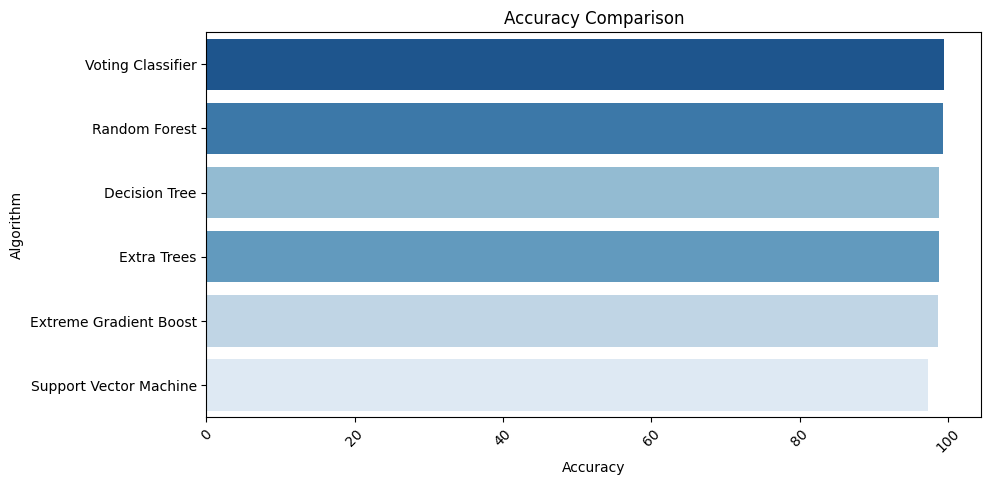

In [48]:
#Accuracy Comparison
models = list(accuracy_models.keys())
accuracies = list(accuracy_models.values())

# Sort data in ascending order for better visualization
models, accuracies = zip(*sorted(accuracy_models.items(), key=lambda x: x[1], reverse=True))

# Create a color palette (darker green for higher accuracy)
palette = sns.color_palette("Blues", len(models))

# Rank accuracies to assign appropriate shades
rank = np.argsort(accuracies).argsort()
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
plt.xticks(rotation=45)
sns.barplot(x=list(accuracies), y=list(models), palette=np.array(palette)[rank])
plt.savefig('Figure 3.png', dpi=1500, bbox_inches='tight')

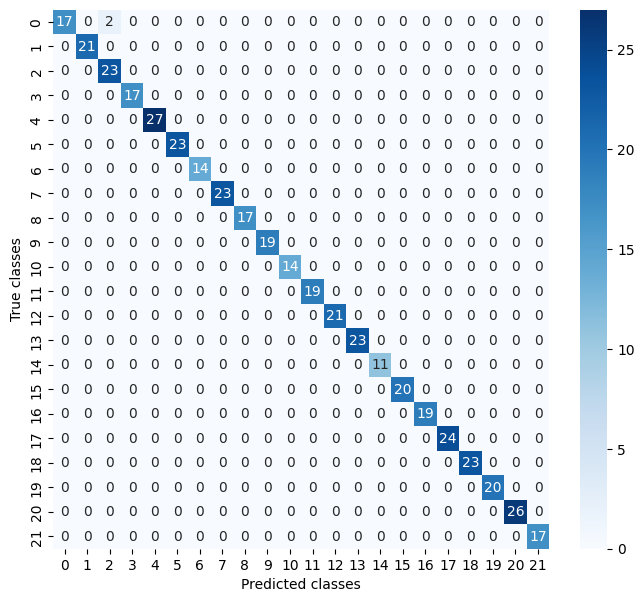

In [49]:
# Confusion Metrics
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true and predicted classes, respectively
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using a heatmap
plt.figure(figsize=(8,7))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted classes')
plt.ylabel('True classes')
plt.show()

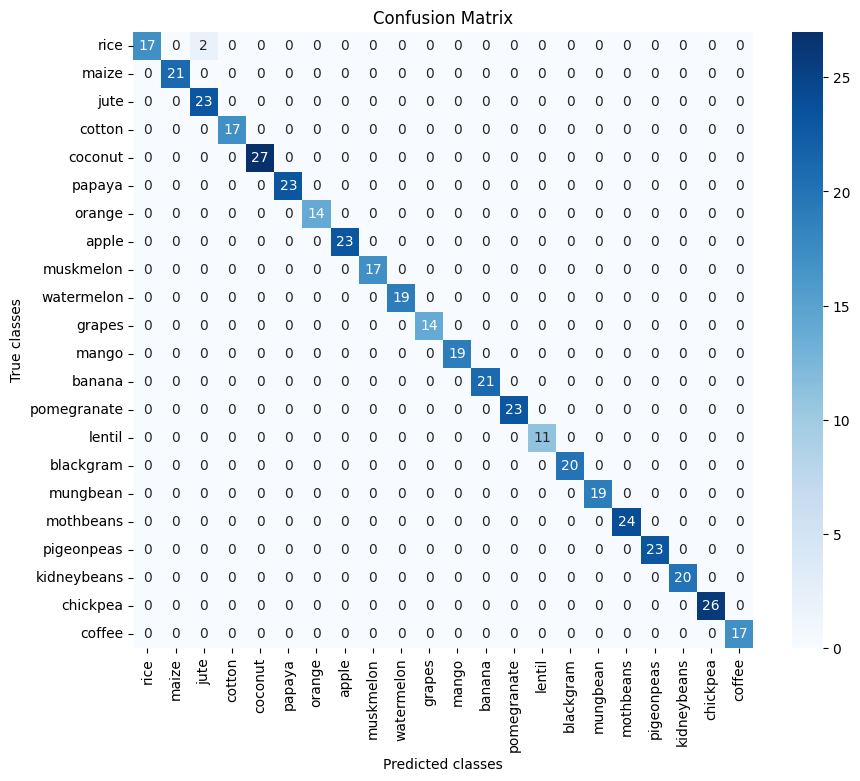

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true and predicted labels
cm = confusion_matrix(y_test, y_pred)

# Define class labels
crop_labels = [
    'rice', 'maize', 'jute', 'cotton', 'coconut', 'papaya', 'orange', 'apple',
    'muskmelon', 'watermelon', 'grapes', 'mango', 'banana', 'pomegranate',
    'lentil', 'blackgram', 'mungbean', 'mothbeans', 'pigeonpeas', 'kidneybeans',
    'chickpea', 'coffee'
]

# Plot confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=crop_labels, yticklabels=crop_labels)
plt.xlabel('Predicted classes')
plt.ylabel('True classes')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)  # Rotate labels for better visibility
plt.yticks(rotation=0)
plt.savefig('high_quality_plot.png', dpi=1500, bbox_inches='tight')
plt.show()
